### The code for the statistical calculation of living area per occupants
### The functions used for estimating the number of occupants in a building with households level

In [ ]:
# function heatedAreaPerHousehold is:
# input:  building heated area heatedArea, number of households in building numberOfHouseholds, pseudo random number generator r
# output:  list of household areas with the length of numberOfHouseholds and the sum of heatedArea
# Create list heatedAreaPerHouseholdList
# Set remainingArea to heatedArea
# Set remainingHouseholds to numberOfHouseholds
# For each household in numberOfHouseholds do
#   Set newValue to getNewHouseholdSize(r)
#   While not isValid (newValue, remainingArea, remainingHouseholds - 1) do
#     Set newValue to getNewHouseholdSize(r)
#   Set remainingArea to remainingArea - newValue
#   Decrement remainingHouseholds
#   Add newValue to heatedAreaPerHouseholdList
# Add remainingArea to heatedAreaPerHouseholdList

In [ ]:
# function getNewHouseholdSize is: 
# input:  pseudo random number generator r array of statistical household area distribution householdDistribution
# output:  A new household area depending on the statistical data  
# Set n to random integer number in interval [0...1000) 
# Set tempSum to 0 
# for each i in 0 ... 9  
#   Set tempSum to tempSum + householdDistribution[i] 
#   if n < tempSum 
#       Set min to 20 + i * 20 
#       Return random double number in interval [0... 20) + min

In [ ]:
# function isValid is: 
# input:  new area value n 
# remaining area of the building remainingArea 
# remaining number of households remainingHouseholds 
# output:  
# true if the new area value can be placed in the building, false otherwise  
# Return (remainingArea - n) / remainingHouseholds > 40 and (remainingArea - n) / remainingHouseholds < 160

In [1]:
# function getNrOfOccupantsForHeatedArea is: 
# input:  
# pseudo number generator r 
# area a 
# occupants distribution table occupantsDistribution as 2-dimensional array 
# output:  number of occupants for the heated area  
# Set index to rounded down ((a - 20) / 20) 
# if index > 9  set index to 9 
# Set n to random integer number in interval [0...1000) 
# Set tempSum to 0 
# for each i in 0 ... 9  
#   Set tempSum to tempSum + occupantsDistribution[index][i] 
#   if n < tempSum 
#       Set nrOfOccupants to i + 1 
#       if nrOfOccupants == 6  
#           Set nrOfOccupants to 6 + random integer from 0 ..2 
# Return nrOfOccupants

# Calculate the distribution of living area per occupants 

### The statistical distribution (probability distribution tabels)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [51]:
# Household sizes (average values / in square meters) and number of occupants for each index
household_size = np.array([30, 50, 70, 90, 110, 130, 150, 170, 190, 210])
number_of_occupants = np.array([1, 2, 3, 4, 5, 7]) # 6+ represented as 6~8; 7 is average for calculating the area per occupant


'''
The statistical distributions are for the whole Germany, not region specific.

'''

# The statistical distribution of household areas (in 20 sqm intervals from 40 to 220 sqm)
area_pmf = np.array([0.053, 0.173, 0.228, 0.164, 0.115, 0.106, 0.067, 0.035, 0.022, 0.037])

# Rows: household area in 20 sqm intervals from 40 to 220 sqm
# Columns: number of occupants from 1 to 5, and 6+

# For number of occupants, the statistical probability distribution over household areas
area_of_occupants_pmf_ = np.array([
    [0.114, 0.009, 0.005, 0.003, 0.003, 0.006],
    [0.303, 0.103, 0.051, 0.026, 0.024, 0.033],
    [0.27,  0.227, 0.195, 0.132, 0.122, 0.123],
    [0.136, 0.196, 0.182, 0.164, 0.176, 0.175],
    [0.071, 0.152, 0.151, 0.145, 0.136, 0.143],
    [0.05,  0.137, 0.157, 0.175, 0.15, 0.137],
    [0.026, 0.08,  0.106, 0.136, 0.127, 0.107],
    [0.012, 0.038, 0.057, 0.081, 0.083, 0.071],
    [0.007, 0.023, 0.036, 0.052, 0.059, 0.056],
    [0.012, 0.035, 0.058, 0.086, 0.12, 0.149]
    ])

# For each household size (are), the statistical distribution of number of occupants 
occupants_of_area_pmf = np.array([
    [0.927059110633631, 0.0529605807557342, 0.0119022574036725, 0.00474706475811662, 0.00158999086491576, 0.00174380062515019],
    [0.761194877739394, 0.181579795144092, 0.0364279365700298, 0.0136359191046399, 0.00415896036058322, 0.00300179198582519],
    [0.512811008795322, 0.303789200431076, 0.106266355674648, 0.0526615859308795, 0.0159691564637147, 0.00850214858077879],
    [0.358293329104416, 0.363701087755891, 0.138184977214084, 0.0910701239682177, 0.031944014860933, 0.0168073750224712],
    [0.266522381688543, 0.401267809660991, 0.162788604056836, 0.114767723296762, 0.0350901526256233, 0.0195637594155317],
    [0.204813755471113, 0.395424812742793, 0.185501976489373, 0.15127721131892, 0.0424552507968956, 0.0205258156477669],
    [0.168862937598044, 0.365832764140915, 0.197957376938244, 0.185682898906593, 0.0565052837292521, 0.0251583668682791],
    [0.14553198225371, 0.335057478640706, 0.204302662371277, 0.212448500250279, 0.0705366527052253, 0.0321241498708674],
    [0.136964020398921, 0.31973480948938, 0.20596871605524, 0.216531388935867, 0.0807784551438265, 0.0400248800547543],
    [0.137652389308018, 0.292968865816548, 0.196771219950028, 0.212200847962437, 0.0966134062160552, 0.0637966399555804]])

# Round to 3 decimal places
occupants_of_area_pmf = np.round(occupants_of_area_pmf, 3)


### Statitistical distribution for the average living area per occupant

In [52]:
# Calculate area per occupant matrix
area_per_occupants = np.zeros((len(household_size), len(number_of_occupants)))
for i in range(len(household_size)):
    for j in range(len(number_of_occupants)):
        area_per_occupants[i][j] = household_size[i] / number_of_occupants[j]
        
# Convert to DataFrame for better display
df_area_per_occupants = pd.DataFrame(
    area_per_occupants,
    index=[f"{size}m²" for size in household_size],
    columns=[f"{n}p" for n in number_of_occupants]
)


#-------- SUMMARY STATISTICS FOR PRE ANALYSIS -------#

print("="*70)
print("AREA PER OCCUPANT (m²/person)")
print("="*70)
print(df_area_per_occupants.round(1))

print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(df_area_per_occupants.describe().round(2))

print("\n" + "="*70)
print("OVERALL STATISTICS")
print("="*70)
print(f"Overall Mean:   {area_per_occupants.mean():.2f} m²/person")
print(f"Overall Median: {np.median(area_per_occupants):.2f} m²/person")
print(f"Overall Std:    {area_per_occupants.std():.2f} m²/person")
print(f"Overall Min:    {area_per_occupants.min():.2f} m²/person")
print(f"Overall Max:    {area_per_occupants.max():.2f} m²/person")
print("="*70)

print("\n" + "="*70)
print("QUANTILE STATISTICS")
print("="*70)

# Define quantiles to calculate
quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]

print(f"{'Quantile':<15} {'Value (m²/person)':<20}")
print("-" * 35)
for q in quantiles:
    value = np.quantile(area_per_occupants, q)
    print(f"{q:>6.0%} ({q:.2f})     {value:>8.2f}")

print("="*70)

AREA PER OCCUPANT (m²/person)
          1p     2p    3p    4p    5p    7p
30m²    30.0   15.0  10.0   7.5   6.0   4.3
50m²    50.0   25.0  16.7  12.5  10.0   7.1
70m²    70.0   35.0  23.3  17.5  14.0  10.0
90m²    90.0   45.0  30.0  22.5  18.0  12.9
110m²  110.0   55.0  36.7  27.5  22.0  15.7
130m²  130.0   65.0  43.3  32.5  26.0  18.6
150m²  150.0   75.0  50.0  37.5  30.0  21.4
170m²  170.0   85.0  56.7  42.5  34.0  24.3
190m²  190.0   95.0  63.3  47.5  38.0  27.1
210m²  210.0  105.0  70.0  52.5  42.0  30.0

SUMMARY STATISTICS
           1p      2p     3p     4p     5p     7p
count   10.00   10.00  10.00  10.00  10.00  10.00
mean   120.00   60.00  40.00  30.00  24.00  17.14
std     60.55   30.28  20.18  15.14  12.11   8.65
min     30.00   15.00  10.00   7.50   6.00   4.29
25%     75.00   37.50  25.00  18.75  15.00  10.71
50%    120.00   60.00  40.00  30.00  24.00  17.14
75%    165.00   82.50  55.00  41.25  33.00  23.57
max    210.00  105.00  70.00  52.50  42.00  30.00

OVERALL STATIST

PMF sum before normalization: 1.000522
PMF sum after normalization: 1.000000
Normalized PMF:
[0.04410598 0.09590494 0.19863831 0.09514533 0.20591051 0.04637779
 0.14869738 0.01171888 0.0657177  0.08778318]


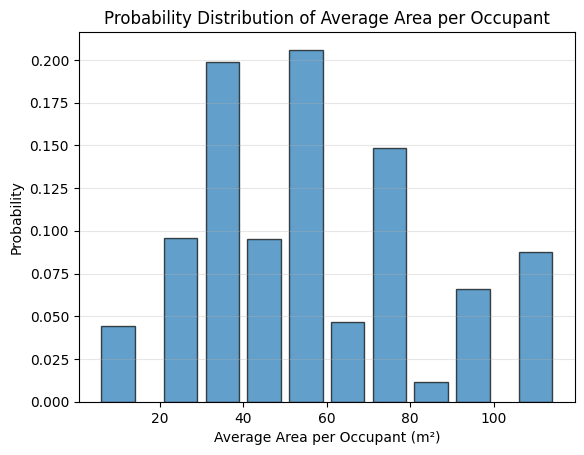


Expected average area per occupant: 56.46 m²/person
The average living area per occupant in Munich is around 51.1 m²/person (from official statistics).
Standard deviation: 26.60 m²/person

NORMALIZED AVERAGE LIVING AREA PER OCCUPANT DISTRIBUTION
Bin Range (m²)       Bin Center      Probability    
----------------------------------------------------------------------
[0, 20)                    10.0       0.044106 ( 4.41%)
[20, 30)                   25.0       0.095905 ( 9.59%)
[30, 40)                   35.0       0.198638 (19.86%)
[40, 50)                   45.0       0.095145 ( 9.51%)
[50, 60)                   55.0       0.205911 (20.59%)
[60, 70)                   65.0       0.046378 ( 4.64%)
[70, 80)                   75.0       0.148697 (14.87%)
[80, 90)                   85.0       0.011719 ( 1.17%)
[90, 100)                  95.0       0.065718 ( 6.57%)
[100, ∞)                  110.0       0.087783 ( 8.78%)


In [ ]:
'''
### Statistical distribution for the average living area per occupant
### Using binning approach
### Bins = [0-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100), [100+)
### Output:  average_living_area_bins, average_living_area_pmf
'''

# The bins, square meters per occupant
bins = np.concatenate([[0], np.arange(20, 110, 10), [np.inf]])

# Get bin indices for each area per occupant
bin_classes = np.digitize(area_per_occupants, bins) - 1  # -1 to make 0-indexed

# Calculate bin averages: to present the value of each bin
bin_averages = (bins[:-1] + bins[1:]) / 2
bin_averages[-1] = bins[-2] + 10  # Handle the inf case
average_living_area_bins = bin_averages

# Calculate joint probabilities (broadcasting)
joint_prob = occupants_of_area_pmf * area_pmf[:, np.newaxis]

# Sum probabilities by bin (vectorized)
average_living_area_pmf = np.bincount(bin_classes.flatten(), 
                        weights=joint_prob.flatten(), 
                        minlength=len(bin_averages))

# ============================================================================
# NORMALIZE THE PMF TO SUM TO 1.0
# ============================================================================
pmf_sum = np.sum(average_living_area_pmf)
print(f"PMF sum before normalization: {pmf_sum:.6f}")

# Normalize to ensure sum equals 1.0
average_living_area_pmf = average_living_area_pmf / pmf_sum

print(f"PMF sum after normalization: {np.sum(average_living_area_pmf):.6f}")
print(f"Normalized PMF:\n{average_living_area_pmf}")

# Verify the normalization
assert np.isclose(np.sum(average_living_area_pmf), 1.0), "PMF does not sum to 1.0!"

# ============================================================================
# VISUALIZATION
# ============================================================================
plt.bar(bin_averages, average_living_area_pmf, width=8, alpha=0.7, edgecolor='black')
plt.xlabel('Average Area per Occupant (m²)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Average Area per Occupant')
plt.grid(axis='y', alpha=0.3)
plt.show()

# ============================================================================
# STATISTICS
# ============================================================================
E_average_living_area = np.sum(bin_averages * average_living_area_pmf)
print(f"\nExpected average area per occupant: {E_average_living_area:.2f} m²/person")

Munich_average_living_area = 51.1  # from official statistics
print(f"The average living area per occupant in Munich is around {Munich_average_living_area} m²/person (from official statistics).")

# Additional statistics
variance_living_area = np.sum((bin_averages - E_average_living_area)**2 * average_living_area_pmf)
std_dev_living_area = np.sqrt(variance_living_area)
print(f"Standard deviation: {std_dev_living_area:.2f} m²/person")

# Print the normalized PMF table
print("\n" + "="*70)
print("NORMALIZED AVERAGE LIVING AREA PER OCCUPANT DISTRIBUTION")
print("="*70)
print(f"{'Bin Range (m²)':<20} {'Bin Center':<15} {'Probability':<15}")
print("-"*70)
for i, (center, prob) in enumerate(zip(bin_averages, average_living_area_pmf)):
    if i < len(bins) - 2:
        bin_range = f"[{bins[i]:.0f}, {bins[i+1]:.0f})"
    else:
        bin_range = f"[{bins[i]:.0f}, ∞)"
    print(f"{bin_range:<20} {center:>10.1f}     {prob:>10.6f} ({prob*100:>5.2f}%)")
print("="*70)

# Estimate the occupants in a building
input: volume, height, storeys <br/>
intermediate: number of households per building, heated area <br/>
output: household size, occupants per household <br/>

### Method: number of occupants per household
The code refined by Git<br/>
Adjustments: for heated area, do reduction before calculating the number of households

In [54]:
# ====================================
# WORKFLOW SUMMARY
# ====================================
'''
class Building:
    """
    Data class for building information required for occupant estimation.
    
    Attributes:
        building_id: Unique identifier for the building (gml_id)
        measured_height: Total height of the building in meters (citygml_measured_height)
        storeys_above_ground: Number of floors above ground (citygml_storeys_above_ground)
        volume: Building volume in cubic meters (_volume)
        function: Building function code (citygml_function)
        roof_type: Roof type code (citygml_roof_type)
    """
    building_id: str
    measured_height: str  # Can be empty string '' or numeric value
    storeys_above_ground: str  # Can be empty string '' or numeric value, None means '0'
    volume: Optional[float] = None
    function: Optional[str] = None
    roof_type: Optional[str] = None

STEP 1: Calculate heated area per building
av_storey_h_and_h_area_building: (class Building)
building: Building, Volume: float
-> 
h_g(average_storey_height): float, A_h (heated_area): float

STEP 1.5: Calculate number of households
calculate_number_of_households: (Step 1: av_storey_h_and_h_area_building)
heated_area: float, storeys: Optional[int] = None (str in Building), measured_height: Optional[float] = None (str in Building)
->
building_type: str, number_of_households: int, adjusted_heated_area: float

STEP 2: Calculate heated area per household
(getNewHouseholdSize:
area_pmf: np.ndarray -> area (household_areas): float

isValid:
area: New household area to validate
remaining_area: Remaining area in the building
remaining_households: Remaining number of households to allocate
-> bool)

heated_area_per_household: (Step 1.5: calculate_number_of_households)
A_h: float (needs to be adjusted_heated_area), 
number_of_households: int, 
area_pmf: np.ndarray, 
timeout: float = 500
-> A_h_per_household: List[float] (area per household)

STEP 3: Calculate number of occupants per household
number_occupants_per_household: (Step 2: heated_area_per_household)
area: float, (area per household)
occupants_of_area_pmf: np.ndarray
-> Number of occupants (1-8): int

STEP 4: Calculate total number of occupants per building
calculate_building_occupants: (Step 2: heated_area_per_household)
household_areas: List[float], occupants_of_area_pmf: np.ndarray, verbose: bool = False
-> 
total_occupants: int, occupants_per_household: List[int], occupants_by_size: Dict[int, int]
'''

'\nclass Building:\n    """\n    Data class for building information required for occupant estimation.\n\n    Attributes:\n        building_id: Unique identifier for the building (gml_id)\n        measured_height: Total height of the building in meters (citygml_measured_height)\n        storeys_above_ground: Number of floors above ground (citygml_storeys_above_ground)\n        volume: Building volume in cubic meters (_volume)\n        function: Building function code (citygml_function)\n        roof_type: Roof type code (citygml_roof_type)\n    """\n    building_id: str\n    measured_height: str  # Can be empty string \'\' or numeric value\n    storeys_above_ground: str  # Can be empty string \'\' or numeric value, None means \'0\'\n    volume: Optional[float] = None\n    function: Optional[str] = None\n    roof_type: Optional[str] = None\n\nSTEP 1: Calculate heated area per building\nav_storey_h_and_h_area_building: (class Building)\nbuilding: Building, Volume: float\n-> \nh_g(average

#### Define class and functions

In [ ]:
import random
import time
import numpy as np
from dataclasses import dataclass
from typing import Optional, Tuple, List


# ============================================================================
# DATA CLASS
# ============================================================================

# @dataclass
# class Building:
#     """
#     Data class for building information required for occupant estimation.
    
#     Attributes:
#         building_id: Unique identifier for the building
#         measured_height: Total height of the building in meters (string or float)
#         storeys_above_ground: Number of floors above ground (string or int)

#     Note: needs to be extended for other attributes as needed, and converted to proper types.
#     """
#     building_id: str
#     measured_height: str  # Can be empty string '' or numeric value
#     storeys_above_ground: str  # Can be empty string '' or numeric value
    
#     def validate(self) -> bool:
#         """Check if building has required attributes with valid values"""
#         if self.measured_height == '' or self.storeys_above_ground == '':
#             return False
        
#         try:
#             height = float(self.measured_height)
#             storeys = float(self.storeys_above_ground)
#             return height > 0 and storeys > 0
#         except (ValueError, TypeError):
#             return False

@dataclass
class Building:
    """
    Data class for building information required for occupant estimation.
    
    Attributes:
        building_id: Unique identifier for the building (gml_id)
        measured_height: Total height of the building in meters (citygml_measured_height)
        storeys_above_ground: Number of floors above ground (citygml_storeys_above_ground)
        volume: Building volume in cubic meters (_volume)
        function: Building function code (citygml_function)
        roof_type: Roof type code (citygml_roof_type)
    """
    building_id: str
    measured_height: str  # Can be empty string '' or numeric value
    storeys_above_ground: str  # Can be empty string '' or numeric value, None means '0'
    volume: Optional[float] = None
    function: Optional[str] = None
    roof_type: Optional[str] = None
    
    def validate(self) -> bool:
        """Check if building has required attributes with valid values"""
        if self.measured_height == '' or self.storeys_above_ground == '':
            return False
        
        try:
            height = float(self.measured_height)
            storeys = float(self.storeys_above_ground)
            return height > 0 and storeys >= 0  # Changed: storeys can be 0
        except (ValueError, TypeError):
            return False
    
    def get_height(self) -> Optional[float]:
        """Safely get building height as float"""
        try:
            return float(self.measured_height) if self.measured_height else None
        except (ValueError, TypeError):
            return None
    
    def get_storeys(self) -> Optional[int]:
        """Safely get number of storeys as int (None becomes 0)"""
        try:
            if not self.storeys_above_ground or self.storeys_above_ground == '':
                return 0
            return int(float(self.storeys_above_ground))
        except (ValueError, TypeError):
            return 0  # Default to 0 if conversion fails
    
    def get_volume(self) -> Optional[float]:
        """Safely get building volume as float"""
        return self.volume if self.volume else None
    
    def get_function(self) -> Optional[str]:
        """Get building function"""
        return self.function if self.function else None
    
    def get_roof_type(self) -> Optional[str]:
        """Get roof type"""
        return self.roof_type if self.roof_type else None

# ============================================================================
# STEP 1: Calculate heated area per building
# Need to make adjustment to calculate the reduced area for service areas
# ============================================================================

def av_storey_h_and_h_area_building(building: Building, Volume: float) -> Tuple[float, float]:
    """
    Calculate average storey height and heated area of a building.
    
    Args:
        building: Building object with measured_height and storeys_above_ground
        Volume: Building volume in cubic meters
        
    Returns:
        tuple: (average_storey_height, heated_area)
               Returns (0, 0) if validation fails
    """
    # Validate building has required attributes
    if not building.validate():
        print("The building does not have a measured height or storeys above ground")
        return 0.0, 0.0
    
    # Convert to float
    measured_height = float(building.measured_height)
    storeys_above_ground = float(building.storeys_above_ground)
    
    # Calculate average storey height
    h_g = measured_height / storeys_above_ground
    
    # Calculate heated area based on storey height
    if 2.5 <= h_g <= 3.0:
        A_h = 0.32 * Volume
    else:
        A_h = ((1 / h_g) - 0.04) * Volume
    
    return h_g, A_h


# ============================================================================
# STEP 1.5: Calculate number of households (NEW - EXTRACTED FUNCTION)
# ============================================================================

def calculate_number_of_households(
    heated_area: float,
    storeys: Optional[int] = None,
    measured_height: Optional[float] = None
) -> Tuple[str, int, float]:
    """
    Calculate the number of households in a building based on heated area.
    For calculation of number of households, the heated area is adjusted first, 
    and then the number of households is calculated based on the adjusted area
    
    Args:
        heated_area: Total heated area of the building in square meters
        storeys: Number of storeys above ground (optional, for better classification)
        measured_height: Building height in meters (optional, for better classification)
        
    Returns:
        tuple containing:
            - building_type: str - Building type classification
            - number_of_households: int - Estimated number of households
            - adjusted_heated_area: float - Heated area after accounting for service areas
    
    Building Type Classification:
        - SFH: heated_area ≤ 130.8 m²
        - MFH: 130.8 < heated_area < 1000 m² and storeys < 10
        - AB: heated_area ≥ 1000 m² or storeys ≥ 10
        - HRB: measured_height > 25 m or storeys > 8
    """
    # Determine building type with enhanced logic
    if measured_height and measured_height > 22.0:
        building_type = "HRB"  # High Rise Building
    elif storeys and storeys > 8:
        building_type = "HRB"
    elif heated_area >= 1000 or (storeys and storeys >= 5):
        building_type = "AB"  # Apartment Block
    elif heated_area > 130.8:
        building_type = "MFH"  # Multi-Family Home
    else:
        building_type = "SFH"  # Single-Family Home
    
    # Calculate households and adjust area
    household_area_map = {
        "SFH": (1, 1.0),        # 1 household, no reduction
        "MFH": (80.2, 0.59),    # 80.2 m²/household, 59% usable
        "AB": (62.4, 0.59),     # 62.4 m²/household, 59% usable
        "HRB": (54.3, 0.59)     # 54.3 m²/household, 59% usable
    }
    
    if building_type == "SFH":
        number_of_households = 1
        adjusted_heated_area = heated_area
    else:
        area_per_household, reduction_factor = household_area_map[building_type]
        adjusted_heated_area = heated_area * reduction_factor
        number_of_households = max(1, round(adjusted_heated_area / area_per_household))  # At least 1 household
    
    return building_type, number_of_households, adjusted_heated_area


# ============================================================================
# STEP 2: Calculate heated area per household
# ============================================================================

def getNewHouseholdSize(area_pmf: np.ndarray) -> float:
    """
    Get new household size based on statistical distribution.
    
    Args:
        area_pmf: Probability mass function for household areas
        
    Returns:
        float: Randomly generated household area in square meters
    """
    # Generate random integer [0, 999]
    n = random.randint(0, 999)
    tempSum = 0
    
    for i in range(len(area_pmf)):
        tempSum += area_pmf[i] * 1000
        
        if n < tempSum:
            # Return area in range [20+i*20, 20+i*20+20)
            min_area = 20 + i * 20
            area = min_area + random.randint(0, 19)
            return float(area)
    
    # Fallback (should rarely happen)
    return 100.0


def isValid(area: float, remaining_area: float, remaining_households: int) -> bool:
    """
    Validate if new area value can be placed in the building.
    
    Args:
        area: New household area to validate
        remaining_area: Remaining area in the building
        remaining_households: Remaining number of households to allocate
        
    Returns:
        bool: True if valid, False otherwise
    """
    if area is None or remaining_households <= 0:
        return False
    
    avg_remaining = (remaining_area - area) / remaining_households
    return 40 <= avg_remaining <= 160


def heated_area_per_household(
    A_h: float, 
    number_of_households: int,
    area_pmf: np.ndarray,
    timeout: float = 500
) -> List[float]:
    """
    Calculate heated area per household using statistical distribution.
    
    Args:
        A_h: Total heated area of the building
        number_of_households: Number of households in the building
        area_pmf: Probability mass function for household areas
        timeout: Maximum time allowed for calculation (seconds)
        
    Returns:
        list: Sorted list of household areas, or 0 if calculation fails
    """
    if number_of_households <= 0:
        return [A_h] if A_h > 0 else []
    
    if number_of_households == 1:
        return [A_h]
    
    start_time = time.time()
    A_h_per_household = []
    remaining_area = A_h
    remaining_households = number_of_households
    
    for household in range(number_of_households):
        # Check timeout
        if time.time() - start_time > timeout:
            print(f"Time limit exceeded for heated area per household calculation")
            return []
        
        # Last household gets remaining area
        if remaining_households == 1:
            A_h_per_household.append(remaining_area)
            return sorted(A_h_per_household)
        
        # Try to find valid area
        attempts = 0
        max_attempts = 10000  # Prevent infinite loop
        
        while attempts < max_attempts:
            area = getNewHouseholdSize(area_pmf)
            
            if isValid(area, remaining_area, remaining_households - 1):
                A_h_per_household.append(area)
                remaining_area -= area
                remaining_households -= 1
                break
            
            attempts += 1
        
        # If no valid area found after max attempts, distribute evenly
        if attempts >= max_attempts:
            print(f"Warning: Could not find valid distribution, using average")
            avg_area = remaining_area / remaining_households
            for _ in range(remaining_households):
                A_h_per_household.append(avg_area)
            return sorted(A_h_per_household)
    
    return sorted(A_h_per_household)


# ============================================================================
# STEP 3: Calculate number of occupants per household
# ============================================================================

def number_occupants_per_household(
    area: float,
    occupants_of_area_pmf: np.ndarray
) -> int:
    """
    Get number of occupants for a household based on heated area.
    
    Args:
        area: Household area in square meters
        occupants_of_area_pmf: Statistical distribution table [10 x 6]
                               Rows: area bins, Columns: number of occupants (1-5, 6+)
        
    Returns:
        int: Number of occupants (1-8)
    """
    # Calculate index based on area (20 sqm bins starting from 20)
    index = int((area - 20) / 20)
    
    # Clamp index to valid range [0, 9]
    index = max(0, min(9, index))
    
    # Generate random number [0, 999]
    n = random.randint(0, 999)
    tempSum = 0
    
    # Iterate through occupant categories (1-5, 6+)
    for i in range(6):  # Fixed: should be 6, not 5
        tempSum += occupants_of_area_pmf[index][i] * 1000
        
        if n < tempSum:
            number_of_occupants = i + 1
            
            # For 6+ category, add random 0-2
            if number_of_occupants == 6:
                number_of_occupants = 6 + random.randint(0, 2)
            
            return number_of_occupants
    
    # Fallback
    return 1


# ============================================================================
# TESTING EXAMPLES
# ============================================================================

# Example 1: Test Building class
building_test = Building(
    building_id="BLD_001",
    measured_height="15.0",
    storeys_above_ground="5"
)

print("Building validation:", building_test.validate())

# Example 2: Test heated area calculation
Volume = 3000  # m³
h_g, A_h = av_storey_h_and_h_area_building(building_test, Volume)
print(f"\nAverage storey height: {h_g:.2f} m")
print(f"Heated area: {A_h:.2f} m²")

# Example 3: Test household calculation
building_type, n_households, adjusted_A_h = calculate_number_of_households(
    heated_area=A_h,
    storeys=5,
    measured_height=15.0
)
print(f"\nBuilding type: {building_type}")
print(f"Number of households: {n_households}")
print(f"Adjusted heated area: {adjusted_A_h:.2f} m²")

# Example 4: Test area distribution (requires area_pmf)
area_pmf = np.array([0.053, 0.173, 0.228, 0.164, 0.115, 0.106, 0.067, 0.035, 0.022, 0.037])
household_areas = heated_area_per_household(adjusted_A_h, n_households, area_pmf)
print(f"\nHousehold areas: {[f'{a:.1f}' for a in household_areas]} m²")

# Example 5: Test occupants calculation (requires occupants_of_area_pmf)
# This should be defined from your earlier cells
if 'occupants_of_area_pmf' in globals():
    for area in household_areas[:3]:  # Test first 3 households
        n_occ = number_occupants_per_household(area, occupants_of_area_pmf)
        print(f"Household {area:.1f}m² → {n_occ} occupants")

Building validation: True

Average storey height: 3.00 m
Heated area: 960.00 m²

Building type: AB
Number of households: 9
Adjusted heated area: 566.40 m²

Household areas: ['24.0', '42.0', '43.4', '45.0', '61.0', '66.0', '75.0', '84.0', '126.0'] m²
Household 24.0m² → 2 occupants
Household 42.0m² → 1 occupants
Household 43.4m² → 3 occupants


In [256]:
# ============================================================================
# STEP 4: Calculate total number of occupants per building
# ============================================================================

def calculate_building_occupants(
    household_areas: List[float],
    occupants_of_area_pmf: np.ndarray,
    verbose: bool = False
) -> Tuple[int, List[int], dict]:
    """
    Calculate the total number of occupants in a building.
    
    Args:
        household_areas: List of household areas in square meters
        occupants_of_area_pmf: Statistical distribution table [10 x 6]
        verbose: If True, print details for each household
        
    Returns:
        tuple containing:
            - total_occupants: int - Total number of occupants in the building
            - occupants_per_household: List[int] - Number of occupants for each household
            - occupants_by_size: dict - Distribution of households by number of occupants
                                       Keys: household size (1p, 2p, 3p, 4p, 5p+)
                                       Values: count of households
    
    Example:
        >>> household_areas = [85.2, 92.1, 78.5]
        >>> total, per_household, distribution = calculate_building_occupants(
        ...     household_areas, occupants_of_area_pmf, verbose=True
        ... )
        >>> print(f"Total occupants: {total}")
    """
    if not household_areas:
        return 0, [], {"1p": 0, "2p": 0, "3p": 0, "4p": 0, "5p+": 0}
    
    total_occupants = 0
    occupants_per_household = []
    
    # Initialize distribution counter
    occupants_by_size = {
        "1p": 0,   # 1 person households
        "2p": 0,   # 2 person households
        "3p": 0,   # 3 person households
        "4p": 0,   # 4 person households
        "5p+": 0   # 5+ person households
    }
    
    # Calculate occupants for each household
    for i, area in enumerate(household_areas):
        n_occ = number_occupants_per_household(area, occupants_of_area_pmf)
        occupants_per_household.append(n_occ)
        total_occupants += n_occ
        
        # Update distribution
        if n_occ == 1:
            occupants_by_size["1p"] += 1
        elif n_occ == 2:
            occupants_by_size["2p"] += 1
        elif n_occ == 3:
            occupants_by_size["3p"] += 1
        elif n_occ == 4:
            occupants_by_size["4p"] += 1
        else:  # n_occ >= 5
            occupants_by_size["5p+"] += 1
        
        # Print details if verbose
        if verbose:
            print(f"Household {i+1}: {area:.1f}m² → {n_occ} occupants")
    
    return total_occupants, occupants_per_household, occupants_by_size


def calculate_building_occupants_summary(
    household_areas: List[float],
    occupants_of_area_pmf: np.ndarray
) -> dict:
    """
    Calculate building occupants with detailed summary statistics.
    
    Args:
        household_areas: List of household areas in square meters
        occupants_of_area_pmf: Statistical distribution table [10 x 6]
        
    Returns:
        dict containing:
            - total_occupants: Total number of occupants
            - total_households: Total number of households
            - avg_occupants_per_household: Average occupants per household
            - occupants_per_household: List of occupants for each household
            - distribution: Household distribution by size
            - area_stats: Statistics about household areas
    """
    total_occ, occ_per_hh, distribution = calculate_building_occupants(
        household_areas, occupants_of_area_pmf, verbose=False
    )
    
    summary = {
        "total_occupants": total_occ,
        "total_households": len(household_areas),
        "avg_occupants_per_household": total_occ / len(household_areas) if household_areas else 0,
        "occupants_per_household": occ_per_hh,
        "distribution": distribution,
        "area_stats": {
            "min_area": min(household_areas) if household_areas else 0,
            "max_area": max(household_areas) if household_areas else 0,
            "avg_area": np.mean(household_areas) if household_areas else 0,
            "total_area": sum(household_areas)
        }
    }
    
    return summary, total_occ


def print_building_occupants_report(summary: dict):
    """
    Print a formatted report of building occupants.
    
    Args:
        summary: Dictionary returned by calculate_building_occupants_summary()
    """
    print("\n" + "="*70)
    print("BUILDING OCCUPANTS REPORT")
    print("="*70)
    
    print(f"\nTotal Occupants:      {summary['total_occupants']} persons")
    print(f"Total Households:     {summary['total_households']}")
    print(f"Avg Occupants/HH:     {summary['avg_occupants_per_household']:.2f} persons/household")
    
    print("\n" + "-"*70)
    print("HOUSEHOLD DISTRIBUTION BY SIZE")
    print("-"*70)
    dist = summary['distribution']
    print(f"1-person households:  {dist['1p']:3d} ({dist['1p']/summary['total_households']*100:5.1f}%)")
    print(f"2-person households:  {dist['2p']:3d} ({dist['2p']/summary['total_households']*100:5.1f}%)")
    print(f"3-person households:  {dist['3p']:3d} ({dist['3p']/summary['total_households']*100:5.1f}%)")
    print(f"4-person households:  {dist['4p']:3d} ({dist['4p']/summary['total_households']*100:5.1f}%)")
    print(f"5+ person households: {dist['5p+']:3d} ({dist['5p+']/summary['total_households']*100:5.1f}%)")
    
    print("\n" + "-"*70)
    print("HOUSEHOLD AREA STATISTICS")
    print("-"*70)
    area = summary['area_stats']
    print(f"Total Area:       {area['total_area']:.2f} m²")
    print(f"Average Area:     {area['avg_area']:.2f} m²/household")
    print(f"Min Area:         {area['min_area']:.2f} m²")
    print(f"Max Area:         {area['max_area']:.2f} m²")
    print(f"Area per Person:  {area['total_area']/summary['total_occupants']:.2f} m²/person")
    
    print("="*70 + "\n")


# ============================================================================
# UPDATED TESTING EXAMPLES
# ============================================================================

# Continue from previous examples...
if 'occupants_of_area_pmf' in globals() and household_areas:
    print("\n" + "="*70)
    print("EXAMPLE: Calculate Building Occupants")
    print("="*70)
    
    # Method 1: Simple calculation with verbose output
    print("\n--- Method 1: Simple Calculation ---")
    total_occ, occ_list, distribution = calculate_building_occupants(
        household_areas, 
        occupants_of_area_pmf, 
        verbose=True
    )
    
    print(f"\n>>> Total Occupants in Building: {total_occ} persons")
    print(f">>> Total Households: {len(household_areas)}")
    print(f">>> Average: {total_occ/len(household_areas):.2f} persons/household")
    print(f">>> Distribution: {distribution}")
    
    # Method 2: Detailed summary
    print("\n--- Method 2: Detailed Summary ---")
    summary, _ = calculate_building_occupants_summary(household_areas, occupants_of_area_pmf)
    print_building_occupants_report(summary)
    
    # Method 3: Quick one-liner for total only
    print("\n--- Method 3: Quick Calculation ---")
    total = sum(number_occupants_per_household(area, occupants_of_area_pmf) 
                for area in household_areas)
    print(f"Total occupants (quick method): {total} persons")


EXAMPLE: Calculate Building Occupants

--- Method 1: Simple Calculation ---
Household 1: 24.0m² → 1 occupants
Household 2: 42.0m² → 1 occupants
Household 3: 43.4m² → 2 occupants
Household 4: 45.0m² → 1 occupants
Household 5: 61.0m² → 1 occupants
Household 6: 66.0m² → 2 occupants
Household 7: 75.0m² → 3 occupants
Household 8: 84.0m² → 1 occupants
Household 9: 126.0m² → 1 occupants

>>> Total Occupants in Building: 13 persons
>>> Total Households: 9
>>> Average: 1.44 persons/household
>>> Distribution: {'1p': 6, '2p': 2, '3p': 1, '4p': 0, '5p+': 0}

--- Method 2: Detailed Summary ---

BUILDING OCCUPANTS REPORT

Total Occupants:      14 persons
Total Households:     9
Avg Occupants/HH:     1.56 persons/household

----------------------------------------------------------------------
HOUSEHOLD DISTRIBUTION BY SIZE
----------------------------------------------------------------------
1-person households:    5 ( 55.6%)
2-person households:    3 ( 33.3%)
3-person households:    1 ( 11.1%)
4

### Method: distribution for the average living area per occupants

In [ ]:
# ====================================
# WORKFLOW SUMMARY
# ====================================
'''
class Building: 
    building_id: str, measured_height: str, storeys_above_ground: str

STEP 1: Calculate heated area per building
av_storey_h_and_h_area_building: (class Building)
building: Building, Volume: float
-> 
h_g(average_storey_height): float, A_h (heated_area): float

STEP 2: calculate_adjusted_heated_area
calculate_adjusted_heated_area: (Step 1: av_storey_h_and_h_area_building)
heated_area: float, storeys: Optional[int] = None (str in Building), measured_height: Optional[float] = None (str in Building)
->
building_type: str, adjusted_heated_area: float

STEP 3: Calculate the number of occupants per building
distr_occupants_a_building: (Step 2: calculate_adjusted_heated_area)
average_living_area_bins: np.ndarray, average_living_area_pmf: np.ndarray, adjusted_heated_area: float
-> OccupantDistribution

class OccupantDistribution:
    """Statistics for occupant distribution in a building"""
    expected_occupants: float
    min_occupants: float
    max_occupants: float
    std_dev_occupants: float
    occupants_array: np.ndarray
    probabilities: np.ndarray

'''

In [1]:
# need to review the code here
import random
import time
import numpy as np
from dataclasses import dataclass
from typing import Optional, Tuple, List, Dict


# ============================================================================
# DATA CLASS
# ============================================================================

# @dataclass
# class Building:
#     """
#     Data class for building information required for occupant estimation.
    
#     Attributes:
#         building_id: Unique identifier for the building
#         measured_height: Total height of the building in meters (string or float)
#         storeys_above_ground: Number of floors above ground (string or int)

#     Note: needs to be extended for other attributes as needed
#     """
#     building_id: str
#     measured_height: str  # Can be empty string '' or numeric value
#     storeys_above_ground: str  # Can be empty string '' or numeric value
    
#     def validate(self) -> bool:
#         """Check if building has required attributes with valid values"""
#         if self.measured_height == '' or self.storeys_above_ground == '':
#             return False
        
#         try:
#             height = float(self.measured_height)
#             storeys = float(self.storeys_above_ground)
#             return height > 0 and storeys > 0
#         except (ValueError, TypeError):
#             return False
    
#     def get_height(self) -> Optional[float]:
#         """Safely get building height as float"""
#         try:
#             return float(self.measured_height) if self.measured_height else None
#         except (ValueError, TypeError):
#             return None
    
#     def get_storeys(self) -> Optional[int]:
#         """Safely get number of storeys as int"""
#         try:
#             return int(float(self.storeys_above_ground)) if self.storeys_above_ground else None
#         except (ValueError, TypeError):
#             return None

@dataclass
class Building:
    """
    Data class for building information required for occupant estimation.
    
    Attributes:
        building_id: Unique identifier for the building (gml_id)
        measured_height: Total height of the building in meters (citygml_measured_height)
        storeys_above_ground: Number of floors above ground (citygml_storeys_above_ground)
        volume: Building volume in cubic meters (_volume)
        function: Building function code (citygml_function)
        roof_type: Roof type code (citygml_roof_type)
    """
    building_id: str
    measured_height: str  # Can be empty string '' or numeric value
    storeys_above_ground: str  # Can be empty string '' or numeric value, None means '0'
    volume: Optional[float] = None
    function: Optional[str] = None
    roof_type: Optional[str] = None
    
    def validate(self) -> bool:
        """Check if building has required attributes with valid values"""
        if self.measured_height == '' or self.storeys_above_ground == '':
            return False
        
        try:
            height = float(self.measured_height)
            storeys = float(self.storeys_above_ground)
            return height > 0 and storeys >= 0  # Changed: storeys can be 0
        except (ValueError, TypeError):
            return False
    
    def get_height(self) -> Optional[float]:
        """Safely get building height as float"""
        try:
            return float(self.measured_height) if self.measured_height else None
        except (ValueError, TypeError):
            return None
    
    def get_storeys(self) -> Optional[int]:
        """Safely get number of storeys as int (None becomes 0)"""
        try:
            if not self.storeys_above_ground or self.storeys_above_ground == '':
                return 0
            return int(float(self.storeys_above_ground))
        except (ValueError, TypeError):
            return 0  # Default to 0 if conversion fails
    
    def get_volume(self) -> Optional[float]:
        """Safely get building volume as float"""
        return self.volume if self.volume else None
    
    def get_function(self) -> Optional[str]:
        """Get building function"""
        return self.function if self.function else None
    
    def get_roof_type(self) -> Optional[str]:
        """Get roof type"""
        return self.roof_type if self.roof_type else None
    
# ============================================================================
# STEP 1: Calculate heated area per building
# ============================================================================

def av_storey_h_and_h_area_building(building: Building, Volume: float) -> Tuple[float, float]:
    """
    Calculate average storey height and heated area of a building.
    
    Args:
        building: Building object with measured_height and storeys_above_ground
        Volume: Building volume in cubic meters
        
    Returns:
        tuple: (average_storey_height, heated_area)
               Returns (0, 0) if validation fails
               
    Raises:
        ValueError: If Volume is non-positive
    """
    # Validate volume
    if Volume <= 0:
        raise ValueError(f"Volume must be positive, got {Volume}")
    
    # Validate building has required attributes
    if not building.validate():
        print(f"Warning: Building {building.building_id} does not have valid measured_height or storeys_above_ground")
        return 0.0, 0.0
    
    # Convert to float
    measured_height = float(building.measured_height)
    storeys_above_ground = float(building.storeys_above_ground)
    
    # Calculate average storey height
    h_g = measured_height / storeys_above_ground
    
    # Calculate heated area based on storey height
    if 2.5 <= h_g <= 3.0:
        A_h = 0.32 * Volume
    else:
        A_h = ((1 / h_g) - 0.04) * Volume
    
    return h_g, A_h


def calculate_adjusted_heated_area(
    heated_area: float,
    storeys: Optional[int] = None,
    measured_height: Optional[float] = None
) -> Tuple[str, float]:
    """
    Calculate adjusted heated area and classify building type.
    
    Args:
        heated_area: Total heated area of the building in square meters
        storeys: Number of storeys above ground (optional, for better classification)
        measured_height: Building height in meters (optional, for better classification)
        
    Returns:
        tuple containing:
            - building_type: str - Building type classification
            - adjusted_heated_area: float - Heated area after accounting for service areas
    
    Building Type Classification:
        - SFH: Single-Family Home (heated_area ≤ 130.8 m²)
        - MFH: Multi-Family Home (130.8 < heated_area < 1000 m² and storeys < 10)
        - AB: Apartment Block (heated_area ≥ 1000 m² or storeys ≥ 10)
        - HRB: High Rise Building (measured_height > 25 m or storeys > 8)
        
    Raises:
        ValueError: If heated_area is non-positive
    """
    if heated_area <= 0:
        raise ValueError(f"Heated area must be positive, got {heated_area}")
    
    # Determine building type with enhanced logic
    if measured_height and measured_height > 25:
        building_type = "HRB"  # High Rise Building
    elif storeys and storeys > 8:
        building_type = "HRB"
    elif heated_area >= 1000 or (storeys and storeys >= 10):
        building_type = "AB"  # Apartment Block
    elif heated_area > 130.8:
        building_type = "MFH"  # Multi-Family Home
    else:
        building_type = "SFH"  # Single-Family Home
    
    # Adjustment factors for different building types
    # SFH: no reduction (100% of area is living space)
    # MFH/AB/HRB: 59% usable (accounting for common areas, corridors, etc.)
    adjust_area_map: Dict[str, float] = {
        "SFH": 1.0,
        "MFH": 0.59,
        "AB": 0.59,
        "HRB": 0.59
    }
    
    reduction_factor = adjust_area_map[building_type]
    adjusted_heated_area = heated_area * reduction_factor
    
    return building_type, adjusted_heated_area


@dataclass
class OccupantDistribution:
    """Statistics for occupant distribution in a building"""
    expected_occupants: float
    min_occupants: float
    max_occupants: float
    std_dev_occupants: float
    occupants_array: np.ndarray
    probabilities: np.ndarray


def distr_occupants_a_building(
    average_living_area_bins: np.ndarray,
    average_living_area_pmf: np.ndarray,
    adjusted_heated_area: float
) -> OccupantDistribution:
    """
    Calculate distribution statistics for number of occupants per building.
    
    Args:
        average_living_area_bins: Array of bin centers for average living area per occupant (m²)
        average_living_area_pmf: Probability mass function for average living area per occupant
        adjusted_heated_area: Adjusted heated area of the building in square meters
        
    Returns:
        OccupantDistribution object containing:
            - expected_occupants: Expected number of occupants
            - min_occupants: Minimum possible occupants
            - max_occupants: Maximum possible occupants
            - std_dev_occupants: Standard deviation of occupant count
            - occupants_array: Array of possible occupant counts
            - probabilities: Corresponding probabilities
            
    Raises:
        ValueError: If inputs are invalid
        
    Example:
        >>> bins = np.array([10., 25., 35., 45., 55., 65., 75., 85., 95., 110.])
        >>> pmf = np.array([0.044129, 0.095955, 0.198742, 0.095195, 0.206018, 
        ...                 0.046402, 0.148775, 0.011725, 0.065752, 0.087829])
        >>> result = distr_occupants_a_building(bins, pmf, 200.0)
        >>> print(f"Expected occupants: {result.expected_occupants:.2f}")
    """
    # Validate inputs
    if adjusted_heated_area <= 0:
        raise ValueError(f"Adjusted heated area must be positive, got {adjusted_heated_area}")
    
    if len(average_living_area_bins) != len(average_living_area_pmf):
        raise ValueError("Bins and PMF must have same length")
    
    if not np.isclose(np.sum(average_living_area_pmf), 1.0):
        raise ValueError(f"PMF must sum to 1.0, got {np.sum(average_living_area_pmf)}")
    
    # Calculate possible number of occupants for each living area bin
    occupants = adjusted_heated_area / average_living_area_bins
    occupants_pmf = average_living_area_pmf
    
    # Calculate statistics
    E_occupants = np.sum(occupants * occupants_pmf)
    variance = np.sum((occupants - E_occupants)**2 * occupants_pmf)
    std_dev = np.sqrt(variance)
    
    return OccupantDistribution(
        expected_occupants=E_occupants,
        min_occupants=np.min(occupants),
        max_occupants=np.max(occupants),
        std_dev_occupants=std_dev,
        occupants_array=occupants,
        probabilities=occupants_pmf
    )


# ============================================================================
# EXAMPLE USAGE
# ============================================================================

if __name__ == "__main__":
    # Example: Create a building
    building = Building(
        building_id="B001",
        measured_height="24.5",
        storeys_above_ground="7"
    )
    
    # Step 1: Calculate heated area
    volume = 5000.0  # cubic meters
    avg_storey_height, heated_area = av_storey_h_and_h_area_building(building, volume)
    print(f"Average storey height: {avg_storey_height:.2f} m")
    print(f"Heated area: {heated_area:.2f} m²")
    
    # Step 2: Calculate adjusted heated area
    building_type, adjusted_area = calculate_adjusted_heated_area(
        heated_area=heated_area,
        storeys=building.get_storeys(),
        measured_height=building.get_height()
    )
    print(f"Building type: {building_type}")
    print(f"Adjusted heated area: {adjusted_area:.2f} m²")
    
    # Step 3: Calculate occupant distribution
    
    occupant_dist = distr_occupants_a_building(bin_averages, average_living_area_pmf, adjusted_area)
    print(f"\nOccupant Distribution:")
    print(f"Expected occupants: {occupant_dist.expected_occupants:.2f}")
    print(f"Range: {occupant_dist.min_occupants:.2f} - {occupant_dist.max_occupants:.2f}")
    print(f"Standard deviation: {occupant_dist.std_dev_occupants:.2f}")

Average storey height: 3.50 m
Heated area: 1228.57 m²
Building type: AB
Adjusted heated area: 724.86 m²


NameError: name 'bin_averages' is not defined